In [ ]:
#importing required libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving next word.txt to next word.txt


In [ ]:
#load and pre-process the data

file = open("next word.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set en"

In [ ]:
len(data)

573660

In [ ]:
#apply tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[142, 4680, 1, 986, 5, 125, 33, 46, 556, 2164, 2165, 27, 987, 14, 22]

In [ ]:
len(sequence_data)

108958

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8624


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Adventures of Sherlock Holmes: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Adventures of Sherlock Holmes:  108955


array([[ 142, 4680,    1,  986],
       [4680,    1,  986,    5],
       [   1,  986,    5,  125],
       [ 986,    5,  125,   33],
       [   5,  125,   33,   46],
       [ 125,   33,   46,  556],
       [  33,   46,  556, 2164],
       [  46,  556, 2164, 2165],
       [ 556, 2164, 2165,   27],
       [2164, 2165,   27,  987]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[ 142 4680    1]
 [4680    1  986]
 [   1  986    5]
 [ 986    5  125]
 [   5  125   33]
 [ 125   33   46]
 [  33   46  556]
 [  46  556 2164]
 [ 556 2164 2165]
 [2164 2165   27]]
Response:  [ 986    5  125   33   46  556 2164 2165   27  987]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

In [ ]:
#creating the model

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             86240     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8624)              8632624   
                                                                 
Total params: 21,767,864
Trainable params: 21,767,864
Non-trainable params: 0
_________________________________________________________________


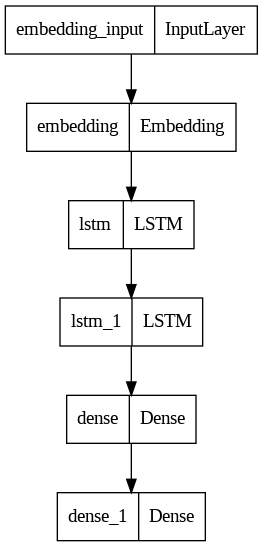

In [ ]:
#plot the model

from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=100, batch_size=64, callbacks=[checkpoint])

Epoch 1/100
1703/1703 [==============================] - ETA: 0s - loss: 6.3953
Epoch 1: loss improved from inf to 6.39535, saving model to next_words.h5
1703/1703 [==============================] - 43s 20ms/step - loss: 6.3953
Epoch 2/100
1703/1703 [==============================] - ETA: 0s - loss: 5.8105
Epoch 2: loss improved from 6.39535 to 5.81047, saving model to next_words.h5
1703/1703 [==============================] - 27s 16ms/step - loss: 5.8105
Epoch 3/100
1703/1703 [==============================] - ETA: 0s - loss: 5.4863
Epoch 3: loss improved from 5.81047 to 5.48626, saving model to next_words.h5
1703/1703 [==============================] - 28s 16ms/step - loss: 5.4863
Epoch 4/100
1703/1703 [==============================] - ETA: 0s - loss: 5.2238
Epoch 4: loss improved from 5.48626 to 5.22380, saving model to next_words.h5
1703/1703 [==============================] - 27s 16ms/step - loss: 5.2238
Epoch 5/100
1703/1703 [==============================] - ETA: 0s - loss: 4.9

In [ ]:
#prediction

from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: STAR
['STAR']
1/1 [==============================] - 1s 687ms/step
i
Enter your line: START OF THIS PROJECT
['OF', 'THIS', 'PROJECT']
1/1 [==============================] - 1s 717ms/step
gutenberg
Enter your line: The Man with the Twisted Lip
['the', 'Twisted', 'Lip']
1/1 [==============================] - 0s 25ms/step
well
Enter your line: My own complete happiness,
['own', 'complete', 'happiness,']
1/1 [==============================] - 0s 19ms/step
i
Enter your line: night—it
['night—it']
1/1 [==============================] - 0s 19ms/step
was
